
# The Effects of Alcohol on Happiness, Performance and Wellbeing
#### By Tucker Paron


# ___________________

## Introduction & Motivation
Alcohol is the most widely used drug globally and plays a massive social role in many Western cultures. Unfortunatley, it also resulted in 3 million deaths with roughly 43% of adults world-wide using alcohol in the year 2016<sup>1</sup>. While there are countless scientific studies pointing towards the harmful effects, it does (when used responsibley) ease anxiety and allow for smoother cohesion and bonding between people. Regardless, many struggle with alcohol abuse and, in turn, encounter troubles down the road. Others, however, seem to get of scot-free with consistent, moderate to heavy consumption and appear to function just fine. To explore just how much of an impact alchol has on individual, data recorded on individual's happiness, family life, and academic performance can be examined. 

## Data
Three data sets will be explored to investigate the impact of alcohol on each facet of an individuals life. To see the relationship between alcohol and happiness, a dataset posted to Kaggle labeled 'Happiness and Alcohol Consumption'<sup>2</sup> was retrieved. To see the relationship between alcohol and student performance and wellbeing, two datasets under the name 'Student Alcohol Consumption'<sup>3</sup> and also posted on Kaggle were retrieved. Of the latter two datasets, one included information on math students and one on Portuguese students. This data was collected from Professor Paulo Cortez of the University of Minho via reports and surveys from the two schools in the study.

Before the analysis it is also important to acknowledge limitations. For the happiness data set - the origin of this data could not be discovered which should be understood while reading this report. This means the quality of the data could not be verified and the conclusions involving this data should thus be taken 'with a grain of salt'. For the student data, it is important to remember that it is data mostly from 15 to 20 year old individuals from just two regions in Portugal. This may mean that conclusions drawn from this data may not apply to all things globally due to cultural and geographical differences. Additionally, for both the happiness (just for the happiness score) and the student (anything scores 1 through 5) sets, the data is self-recorded and therefore fully subjective and based entirely on the individuals self-perception.

## Methods
To gain an understanding of the relationship between alcohol and the aforementioned variables, several basic statistical methods will be used. More specifically, scatterplots, histograms, and boxplots will be used to visualize the relationships (based on the variable types) to determine and identify more obvious results. For relationships whose significance cannot immediately be determined by visuals, Pearson correlation coefficients and/or independent t-tests will be used.

With regards to structure, alcohol use will first be observed in an exploratory sense only to examine where/who it is used by the most. Then the speculated correlations will be examined. This will be done first with the happiness which is on a more macro scale, examining regions as a whole, and then with the student data which is on a more micro scale, looking at data from individuals.

## Analysis
### Happiness
Before delving into the real analysis it is important to look first at alcohol consumption in a broader sense. Consumption varies of course by country but more so by region and even by hemisphere. It is important to realize this for cultural understanding, but more importantly for context for the rest of the study.

As is shown below in the left-most graph of Figure 1, alcohol is certainly more prevalent is Western cultures with Western Europe topping the list and the Middle East and Subsaharan Africa ranking as the lowest consuming regions. This is likely a result of religion - Islam, which is most practiced in Asia amd Northern Africa, technically forbids the consumption of alcohol. When compared to the graph on the right, (which has identical order on the x-axis) it seems happiness has a somewhat positive correlation to alcohol consumption when observing at this macro scale. 'Happiness Score' is an individuals self recorded happiness on a scale of 1 to 10, which is then collected and averaged to get a score for the countries and regions.

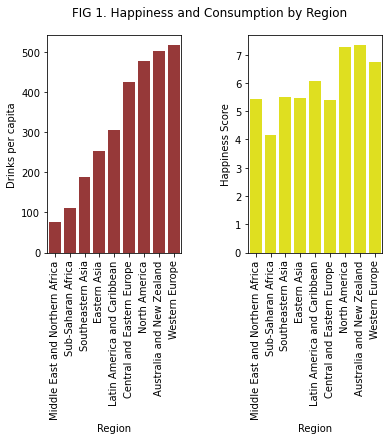

In [47]:
# Import Packages
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##### LOAD
df = pd.read_csv("data/HappinessAlcoholConsumption.csv") # happiness and alcohol consumption by country

##### PROCESS
df['TotalDrinks_PerCapita'] = ( df['Beer_PerCapita'] + df['Spirit_PerCapita'] + df['Wine_PerCapita']) # total drinks per capita

### Happiness and Consumption by Region
df_reg = df.groupby('Region', as_index=False)[['TotalDrinks_PerCapita', 'HappinessScore']].mean()
df_reg = df_reg.filter(items=['Region', 'TotalDrinks_PerCapita', 'HappinessScore'])

fig, axs = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('FIG 1. Happiness and Consumption by Region')

x = df_reg['Region']
y1 = df_reg['TotalDrinks_PerCapita']
y2 = df_reg['HappinessScore']

bp1 = sns.barplot(x = x, y = y1, color='brown', ax=axs[0], order=df_reg.sort_values('TotalDrinks_PerCapita').Region)
bp2 = sns.barplot(x = x, y = y2, color='yellow', ax=axs[1], order=df_reg.sort_values('TotalDrinks_PerCapita').Region)

bp1.set_ylabel("Drinks per capita", fontsize = 10)
bp2.set_ylabel("Happiness Score", fontsize = 10)
bp1.set_xticklabels(bp1.get_xticklabels(), rotation = 90);
bp2.set_xticklabels(bp2.get_xticklabels(), rotation = 90);

To further test the above findings, it is important to break down the data further. Looking now at consumption by alcohol type, Figure 2 shows the correlation of each type of alcohol by Happiness. All appear to have at least a somewhat positive correlation, however the only one of significance appears to be the relationship between all alcohol types combined and happiness score. We can verify this by looking to the abreviated Pearson correlation matrix below Figure 2.

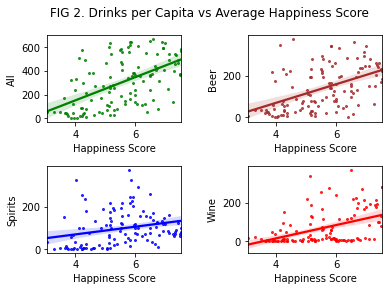

In [3]:
# Does happiness have a connection to alcohol consumption? With certain types?
### Happiness Score by Drinks
fig, axs = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('FIG 2. Drinks per Capita vs Average Happiness Score')

x = df['HappinessScore']
y1 = df['TotalDrinks_PerCapita']
y2 = df['Beer_PerCapita']
y3 = df['Spirit_PerCapita']
y4 = df['Wine_PerCapita']

s1 = sns.regplot(x = x, y = y1, color='green', ax=axs[0][0], scatter_kws={'s':4})
s2 = sns.regplot(x = x, y = y2, color='brown', ax=axs[0][1], scatter_kws={'s':4})
s3 = sns.regplot(x = x, y = y3, color='blue', ax=axs[1][0], scatter_kws={'s':4})
s4 = sns.regplot(x = x, y = y4, color='red', ax=axs[1][1], scatter_kws={'s':4})

s1.set_ylabel("All", fontsize = 10)
s1.set_xlabel("Happiness Score", fontsize = 10)
s2.set_ylabel("Beer", fontsize = 10)
s2.set_xlabel("Happiness Score", fontsize = 10)
s3.set_ylabel("Spirits", fontsize = 10)
s3.set_xlabel("Happiness Score", fontsize = 10)
s4.set_ylabel("Wine", fontsize = 10)
s4.set_xlabel("Happiness Score", fontsize = 10);

In [4]:
df_fig2 = df.drop(['Country', 'Region', 'Hemisphere', 'HDI'], 1)
matrix_fig2 = df_fig2.corr()
matrix_fig2.style.background_gradient(cmap='coolwarm').set_precision(3)
matrix_fig2[['HappinessScore']]

,HappinessScore
HappinessScore,1.000000
GDP_PerCapita,-0.451425
Beer_PerCapita,0.493367
Spirit_PerCapita,0.256399
Wine_PerCapita,0.450589
TotalDrinks_PerCapita,0.547461


Using this matrix, we can see none of the values yield a significant value pointing to no relationship between happiness and alcohol consumption. The initial appearance of association from the Figure 2 scatterplots is likely due to the scale of the axes making the regression line appear to have a large slope than is actually has.

### Performance & Wellbeing
Perhaps most commonly alcohol is assocatied with detriment to an individuals health, in particular, that of young people. Consumption of alcohol is often culturally (at least in Western society) associated with poor performance in school and unfortunate physical costs. To quantify these effects, individuals aged 15 to 20 were examined and all aspects of their academic and home life were recorded. As with the regional data above, it is crucial to first explore the data.

Looking below at Figure 3 several distinct factors stand out. Males (M) tend to drink significantly more than their female (F) counterparts and students in general tend to increase consumption with age. Additionally, individuals living in rural (R) areas tend to indulge more in alcohol than those living in  (U) areas. Parental status seemed to have no signifcant relationship, however the median consiumption for individuals with parents who are together (T) is higher than individuals with parents who are separated or apart (A).

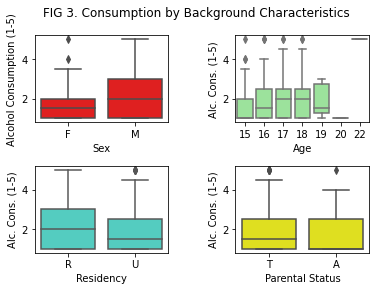

In [41]:
# Import Packages
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##### LOAD DATA
df = pd.read_csv("data/StudentPerformance.csv")

##### PROCESS DATA
df['total_alc'] = ((df['Walc.x'] + df['Dalc.x'])/2)
df['failures'] = (df['failures.x'] + df['failures.y'])
df['absences'] = (df['absences.x'] + df['absences.y'])
df['health'] = (df['health.x'] + df['health.y'])
df['math_grade'] = (df['G3.x'])
df['port_grade'] = (df['G3.y'])
df['health'] = df['health.x']
df.rename(columns={'studytime.x': 'study_time', 'famrel.x':'fam_rel', 'activities.x':'activities', 'romantic.x':'romantic'}, inplace=True)

##### ANALYZE DATA

# What makes students more/less likely to drink?
### Gender, age, residency, parental status vs alcohol
fig, axs = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('FIG 3. Consumption by Background Characteristics')

y = df['total_alc']
x1 = df['sex']
x2 = df['age']
x3 = df['address']
x4 = df['Pstatus']

bp1 = sns.boxplot(x = x1, y = y, color='red', ax=axs[0][0])
bp2 = sns.boxplot(x = x2, y = y, color='lightgreen', ax=axs[0][1])
bp3 = sns.boxplot(x = x3, y = y, color='turquoise', ax=axs[1][0])
bp4 = sns.boxplot(x = x4, y = y, color='yellow', ax=axs[1][1])

bp1.set_ylabel("Alcohol Consumption (1-5)")
bp1.set_xlabel("Sex", fontsize = 10)
bp2.set_ylabel("Alc. Cons. (1-5)")
bp2.set_xlabel("Age", fontsize = 10)
bp3.set_ylabel("Alc. Cons. (1-5)")
bp3.set_xlabel("Residency", fontsize = 10)
bp4.set_ylabel("Alc. Cons. (1-5)")
bp4.set_xlabel("Parental Status", fontsize = 10);

Now that the type of student who is more prone to drinking is identified, it is crucial to understand if these students are more at risk of academic deficiency or poorer wellness. To do so the level of alcohol consumption can be compared to grades, failures, health, relationships, etc. First, the academic side will be examined.

As is evident in Figure 4a. grades showed a relatively small, but clear, decline as consmuption increased. The range of scores also tended to narrow (this may be due to there being a smaller sample size of heavy consumers (ie. 4 to 5 range). Study time seemed to drop off after individuals categorized as a 1 for consumption but then plateued and failures were much more common among students in the 3 to 5 range than in the 1 to 2 range (of consumption). Based solely off of these figures it is easy to get a sense that alcohol is in fact correlating with a decline in grades and study time and an increase in failures; however, to gain a concrete understanding it is necessary to compute the actual Pearson correlation coefficients.

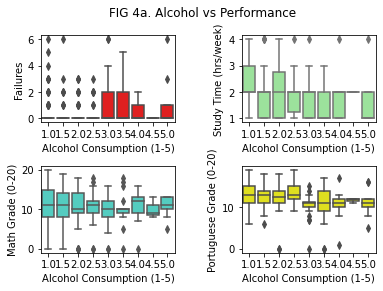

In [42]:
# Does alcohol have a connection to a student's performance and general wellbeing?
### Alcohol vs failures, study time, absences, grades (math), grades (portuguese)
fig, axs = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('FIG 4a. Alcohol vs Performance')

x = df['total_alc']
y1 = df['failures']
y2 = df['study_time']
y3 = df['math_grade']
y4 = df['port_grade']

bp1 = sns.boxplot(x = x, y = y1, color='red', ax=axs[0][0])
bp2 = sns.boxplot(x = x, y = y2, color='lightgreen', ax=axs[0][1])
bp3 = sns.boxplot(x = x, y = y3, color='turquoise', ax=axs[1][0])
bp4 = sns.boxplot(x = x, y = y4, color='yellow', ax=axs[1][1])

bp1.set_xlabel("Alcohol Consumption (1-5)")
bp1.set_ylabel("Failures", fontsize = 10)
bp2.set_xlabel("Alcohol Consumption (1-5)")
bp2.set_ylabel("Study Time (hrs/week)", fontsize = 10)
bp3.set_xlabel("Alcohol Consumption (1-5)")
bp3.set_ylabel("Math Grade (0-20)", fontsize = 10)
bp4.set_xlabel("Alcohol Consumption (1-5)")
bp4.set_ylabel("Portuguese Grade (0-20)", fontsize = 10);

In the below, abreviated matrix the Pearson correlation coefficients for the variables in Figure 4a. are shown. While study time, math grade, and portuguese grades do have a negative coefficient and failures has a positive one (which supports the above remarks), none of the coefficients are signifcant with all having an absolute value of no more than .3. In short, the data does agree with the hypothesis that an increase in alcohol consumption leads to a decrease in academic performance; however, it does not provide statistically significant evidence (ie. a Pearson correlation coefficient greater than about |.7| or |.8| ).

In [19]:
df_fig4a = df[['total_alc', 'failures', 'study_time', 'math_grade', 'port_grade']]
matrix_fig4a = df_fig4a.corr()
matrix_fig4a.style.background_gradient(cmap='coolwarm').set_precision(3)
matrix_fig4a[['total_alc']]

,total_alc
total_alc,1.000000
failures,0.189908
study_time,-0.243169
math_grade,-0.037864
port_grade,-0.263665


Looking beyond at how alcohol relates to wellness in young people, it is more difficult to see clear trends from just visuals as is shown by Figure 4b. Consumption is nearly identical regardless of romantic relationships or extracuriculars. There is some change in health and and family relationship quality as consumption changes although to no pattern. There is little suspicion of association based on this figure but it is still worthwhile to examine the correlation coefficients (for the quantitative health and family relationship quality variables) as well as independent t-test for the other two variables to compare population means.

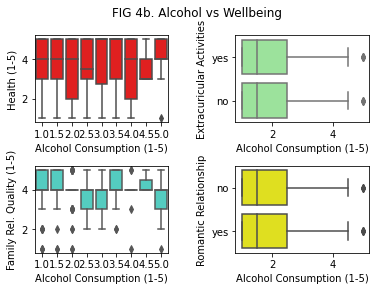

In [33]:
### Alcohol vs health, family relationship, extracuriculars and romantic relationship
fig, axs = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('FIG 4b. Alcohol vs Wellbeing')

x = df['total_alc']
y1 = df['health']
y2 = df['activities']
y3 = df['fam_rel']
y4 = df['romantic']

bp1 = sns.boxplot(x = x, y = y1, color='red', ax=axs[0][0])
bp2 = sns.boxplot(x = x, y = y2, color='lightgreen', ax=axs[0][1])
bp3 = sns.boxplot(x = x, y = y3, color='turquoise', ax=axs[1][0])
bp4 = sns.boxplot(x = x, y = y4, color='yellow', ax=axs[1][1])

bp1.set_xlabel("Alcohol Consumption (1-5)")
bp1.set_ylabel("Health (1-5)", fontsize = 10)
bp2.set_xlabel("Alcohol Consumption (1-5)")
bp2.set_ylabel("Extracuricular Activities", fontsize = 10)
bp3.set_xlabel("Alcohol Consumption (1-5)")
bp3.set_ylabel("Family Rel. Quality (1-5)", fontsize = 10)
bp4.set_xlabel("Alcohol Consumption (1-5)")
bp4.set_ylabel("Romantic Relationship", fontsize = 10);

As was appropriatley assessed, none of the coefficient or generated p-values were significant. Both t-tests yielded values well above that of the .05 standard and neither of the coefficients, as is seen below, even registered an absolute value of .2. Based on the visualizations and test statistics it is conclusive that their is no signifcant relationship between alcohol and the aforementioned 'wellness' variables.

In [45]:
df_a_yes = df[df['activities']=='yes']
df_a_no = df[df['activities']=='no']
df_fr_yes = df[df['fam_rel']=='yes']
df_fr_no = df[df['fam_rel']=='no']

ttest_ind(df_a_yes['total_alc'], df_a_no['total_alc'])
ttest_ind(df_fr_no['total_alc'], df_fr_yes['total_alc'])

df_fig4b = df[['total_alc', 'health', 'fam_rel']]
matrix_fig4b = df_fig4b.corr()
matrix_fig4b.style.background_gradient(cmap='coolwarm').set_precision(3)
matrix_fig4b[['total_alc']]

,total_alc
total_alc,1.000000
health,0.072469
fam_rel,-0.120605


## Results & Conclusion

Based on the results discussed in the analysis, it seems alcohol does show relation to at least happiness and academic performance, but not general wellness (in terms of self-percieved: family relationships, health, romantic relationships, and extracuricular activities). However, while alcohol did **seem** to have an association with happiness and academic performance, neither were found to be statistically significant thus leading the study to an inconclusive result in this regard. With regards to the intitial hypothesis and assumptions there were not many surpirses that could not intuitively be explained. Happiness tended to correlate (not techinically signifcantly, however) with consumption which is more likely due to happiness's correlation with HDI (something that was found to be signifcant in the preliminary analysis leading up to the report - see the graphic below). 

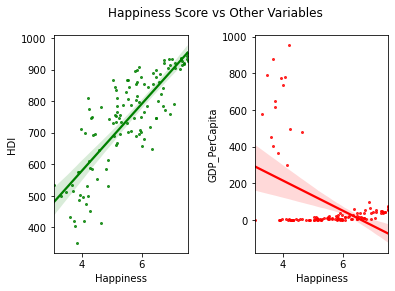

In [50]:
# Is happiness correlated with HDI & GDP?
### Happiness by HDI & GDP
fig, axs = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle('Happiness Score vs Other Variables')

x = df['HappinessScore']
y1 = df['HDI']
y2 = df['GDP_PerCapita']

sp1 = sns.regplot(x = x, y = y1, color='green', ax=axs[0],  scatter_kws={'s':4})
sp2 = sns.regplot(x = x, y = y2, color='red', ax=axs[1],  scatter_kws={'s':4})

sp1.set_ylabel("HDI", fontsize = 10)
sp1.set_xlabel("Happiness", fontsize = 10)
sp2.set_ylabel("GDP_PerCapita", fontsize = 10)
sp2.set_xlabel("Happiness", fontsize = 10);

More developed countries tend to have people more able to afford alcohol. The other (non-statistically signifcant) correlations are fairly intuitive as well; higher consumption leading to lower grades as drinking, particularly during the week, could impaire students the following day when testing for example. The only result that was surprising was the lack of correlation between health and alcohol. This, more than any other relationship, was expected to be the most drastic in a negative fashion. A possible explanation could be response bias - maybe students who know they live tradionally unhealthy lives would want to say they feel better than they actually do? This is just one possibility.

In future research it would be interesting to do more analysis on confoundance between these variables through multiple linear regression to see how variables effect one another in tandem. Additionally, it would be nice to see how these same relationships changed when using the variables for consumption during the week and during the weekend (as opposed to using the combined averaged score as was done in this study) to see if drinking during the week had a bigger impact than the weekend or vice-versa.

# References
1. “Global Information System on Alcohol and Health”. World Health Organization. https://www.who.int/data/gho/data/themes/global-information-system-on-alcohol-and-health. https://www.who.int/data/gho/data/themes/global-information-system-on-alcohol-and-health
2. Marcos Pessotto. Happiness and Alcohol Consumption. 2018. Kaggle. https://www.kaggle.com/marcospessotto/happiness-and-alcohol-consumption
3. P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 